# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
# Read in Original Data
library (readr)
urlfile="https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homework%20datasets/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv"
hcp <- read_csv(url(urlfile))
head(hcp)

# Make new dataframe
library(tidyverse)
data <- hcp %>% select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)
head(data)

# Remove all NAs
d1 <- drop_na(data)
head(d1)


Rows: 1206 Columns: 500
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (64): Release, Acquisition, Gender, Age, NEORAW_01, NEORAW_02, NEORAW_...
dbl  (434): Subject, MMSE_Score, PSQI_Score, PSQI_Comp1, PSQI_Comp2, PSQI_Co...
time   (2): PSQI_BedTime, PSQI_GetUpTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ dplyr   1.1.0
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.3.0     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100004,M,121.97,NA,NA
100206,M,130.42,543134,807245
100307,F,112.56,407292,664124
100408,M,121.18,500417,726206
100610,M,126.53,512946,762308
101006,F,101.85,429449,579632


Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100206,M,130.42,543134,807245
100307,F,112.56,407292,664124
100408,M,121.18,500417,726206
100610,M,126.53,512946,762308
101006,F,101.85,429449,579632
101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


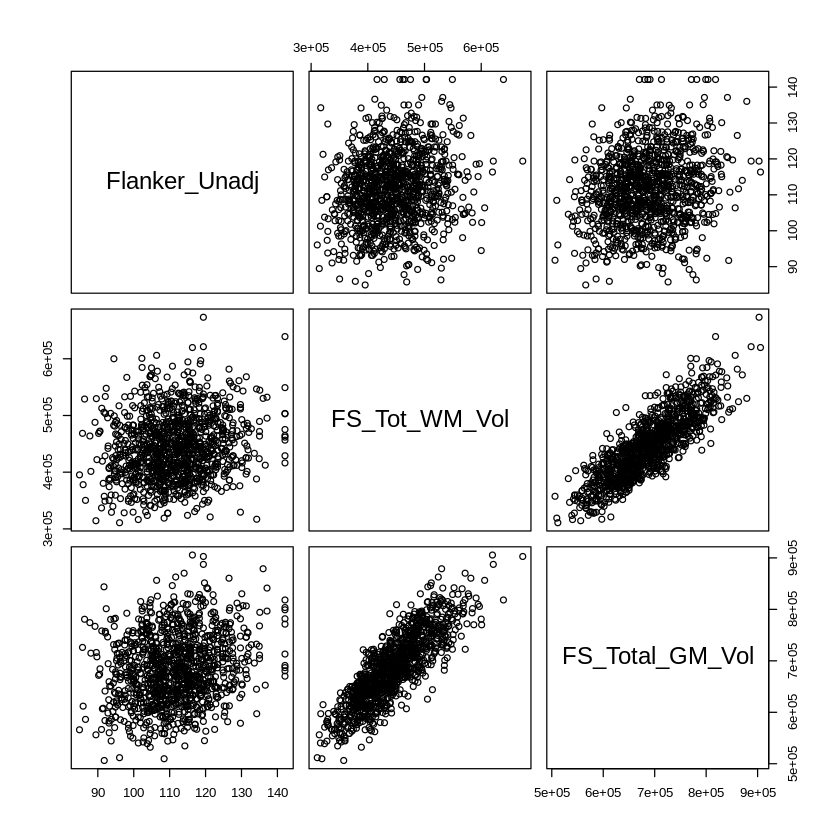

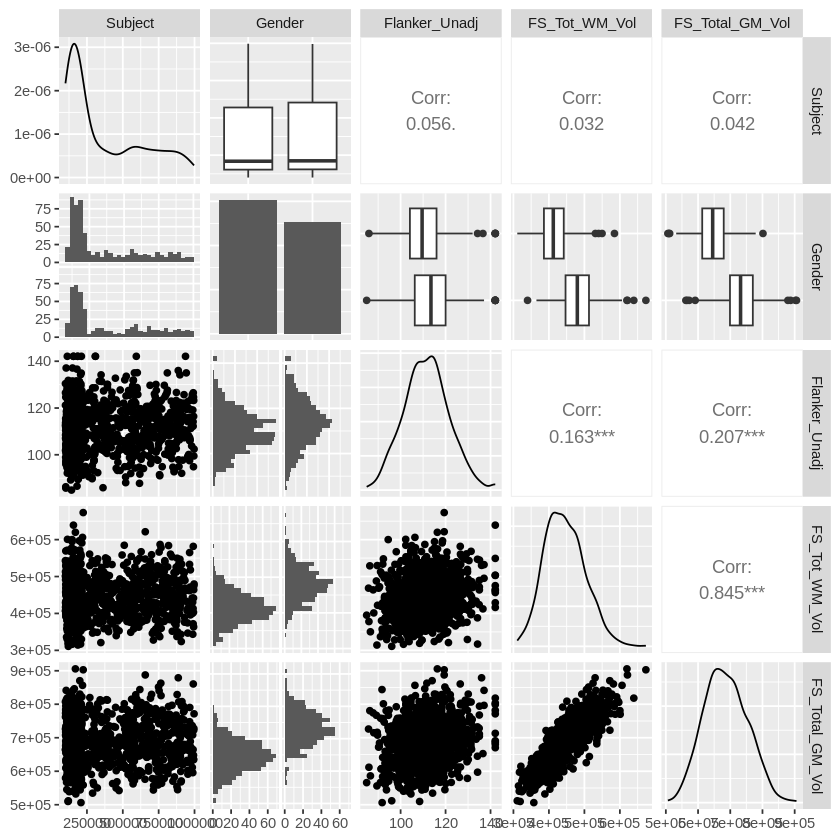

In [2]:
pairs(~ Flanker_Unadj + FS_Tot_WM_Vol + FS_Total_GM_Vol, data = d1) # only cont. variables

install.packages("GGally")
library(GGally)
ggpairs(d1) # see all correlations, for continuous and categorical

- Subject is not correlated with any variables
- Gender is not correlated with any variables
- FS_Tot_WM_Vol and Flanker_Unadj: do not appear correlated (very weak positive correlation)
- FS_Total_GM_Vol and Flaker_Unadj: do not appear correlated (very weak positive correlation)
- FS_Total_GM_Vol and FS_Tot_WM_Vol: positive correlation 


---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [3]:
model1  <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, d1) #build model
summary(model1) #look at summary output
coef(model1) #look just at coefficients
confint(model1) #confidence intervals


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


Mean coefficient values/estimates: 
- intercept (Flanker_Unadj): 9.025646e+01
- FS_Total_GM_Vol: 3.109965e-05

Confidence intervals:
- intercept (Flanker_Unadj): [8.428917e+01, 9.622375e+01
]
- FS_Total_GM_Vol: [2.244198e-05, 3.975733e-05]

Yes, grey matter volume is significantly associated with Flanker Task performance.
> 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula = 'y ~ x'


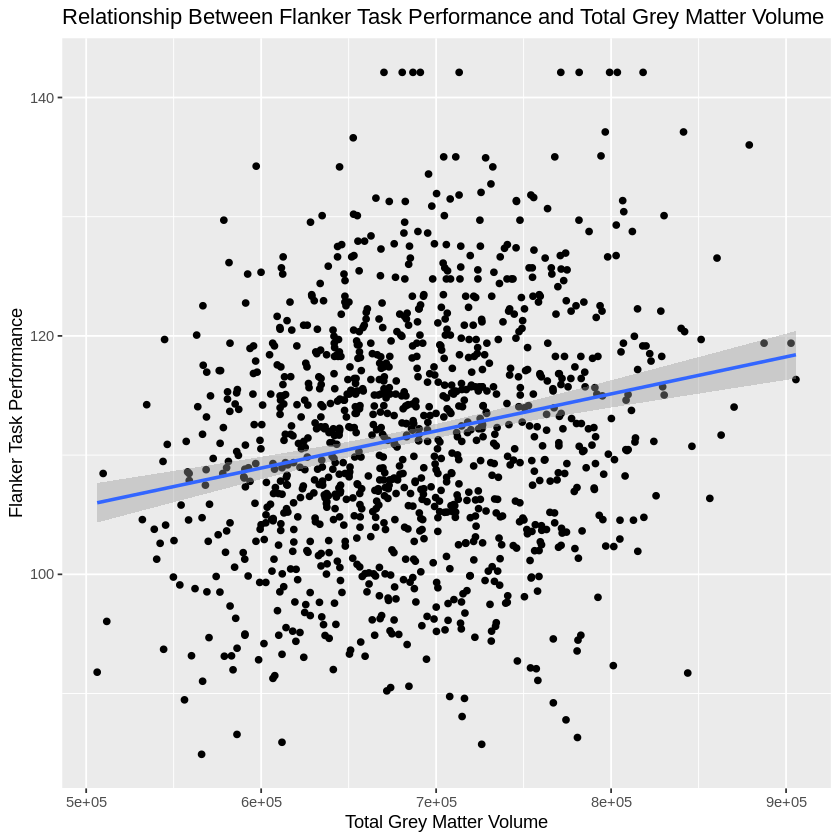

In [ ]:
ggplot(data = d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) + 
        geom_point() +
        geom_smooth(method = "lm") +
        labs(y = "Flanker Task Performance",x = "Total Grey Matter Volume", 
        title ="Relationship Between Flanker Task Performance and Total Grey Matter Volume")

> *We can see a positive correlation between Flanker_Unadj and
FS_Total_GM_Volume; as one's performance in the Flanker Task goes
up, we also see higher total grey matter volume.* 
> 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *We can conclude there is a positive association between Flanker_Unadj and FS_Total_GM_Volume where we see better performance on the Flanker test with individuals with higher total grey matter volume. Based on the initial correlation graph alone, seen with the pairs() function, we were unable to really tell that the two variables were correlated. After running an lm and checking for significance, we can now conclude these two variables indeed have a significant positive association.* 
> 

**DUE:** 5pm EST, February 27, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Sara Jaramillo*